In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo, z_at_value
import coop_post_processing as cpp
from scipy import ndimage
import coop_setup_funcs as csf
import warnings
from astropy.visualization import quantity_support
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
# set plot params
import matplotlib as mpl
import scipy as sp
mpl.font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 3}
plt.rcParams.update({'font.size': 14})
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
import healpy as hp

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import stats as st

In [2]:
# Define the distance bins
dbins = [[893, 1393], [1493, 1993], [2093, 2593], [2693,3193]]
for dbin in dbins:
    print(z_at_value(cosmo.comoving_distance, (dbin[0]-50)*u.Mpc),z_at_value(cosmo.comoving_distance, (dbin[1]+50)*u.Mpc))

zbins = ['0pt20_0pt36', '0pt36_0pt53', '0pt53_0pt72', '0pt72_0pt94'] # the z bins for number density maps
actpath  = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
buzzpath = "/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/"
mask =  "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits"

0.19985555905328484 redshift 0.3565167560560754 redshift
0.3565167560560754 redshift 0.5289988643902372 redshift
0.5289988643902372 redshift 0.7215854982816572 redshift
0.7215854982816572 redshift 0.9396687416637612 redshift


In [3]:
nu_e_cuts = True
if nu_e_cuts:
    pt_selection_str = 'nugt2_egtpt3_'
else:
    pt_selection_str = ''
nreg = 24


Red. chi-squared between fiducial CIB-deproj and no-deproj:
2.5 index 18
2.5 index 18


2.5 index 18
2.5 index 18
2.5 index 18
2.5 index 18
z=[0.21,0.34], m=0, chi_red= 0.014640656579279338
Systematic error: [-5.00314458  0.61116875 -1.0128477 ] percent


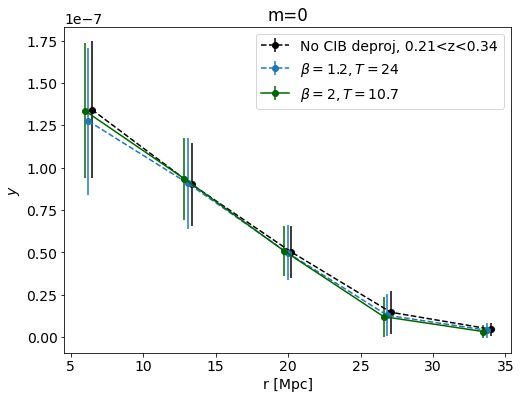

z=[0.21,0.34], m=1, chi_red= 0.03184843716069736
Systematic error: [  0.84316562  -1.50911679 -15.08555457] percent


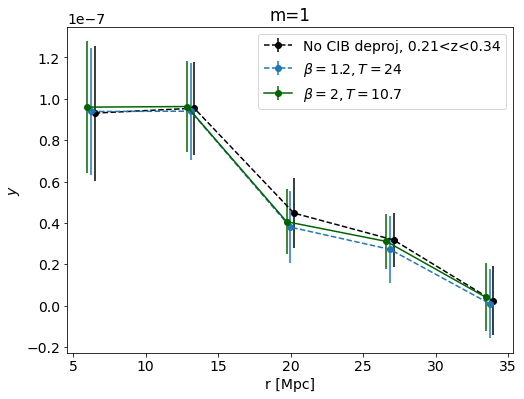

z=[0.21,0.34], m=2, chi_red= 0.01930289714835648
Systematic error: [-35.49110382   0.92392596  -0.57186303] percent


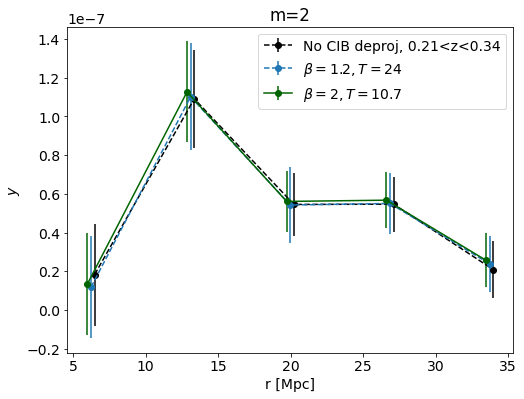

z=[0.21,0.34], m=3, chi_red= 0.021202640964497844
Systematic error: [  5.2794896  -13.83404268 -17.38693613] percent


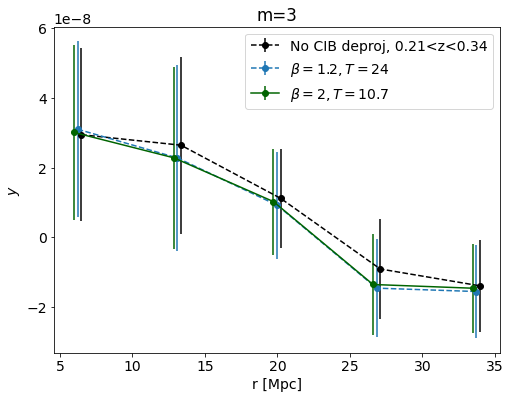

z=[0.21,0.34], m=4, chi_red= 0.009494579771058321
Systematic error: [  1.45120661  -7.74253039 -24.92023934] percent


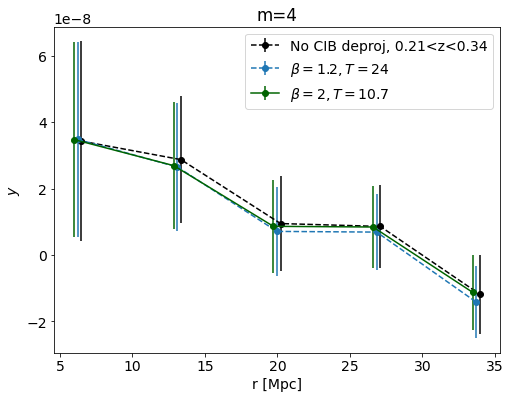

2.5 index 11
2.5 index 11
2.5 index 11
2.5 index 11
2.5 index 11
2.5 index 11
z=[0.37,0.51], m=0, chi_red= 0.026651300625230752
Systematic error: [-1.26169114 -5.28749351 -3.08763257] percent


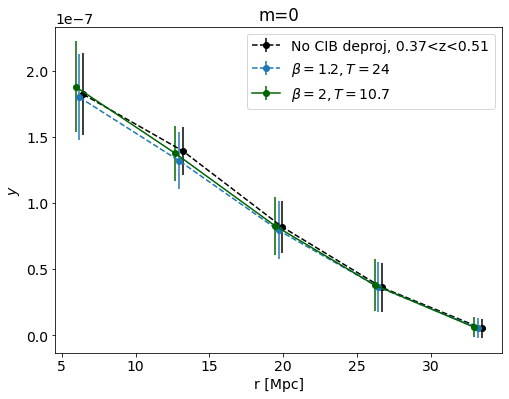

z=[0.37,0.51], m=1, chi_red= 0.05436024830735331
Systematic error: [-12.73222042  -8.00284594 -12.20324651] percent


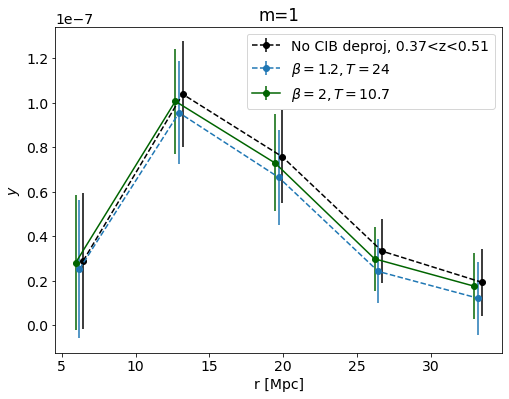

z=[0.37,0.51], m=2, chi_red= 0.03288545056961199
Systematic error: [ -6.17215075  -5.52361802 -10.68637574] percent


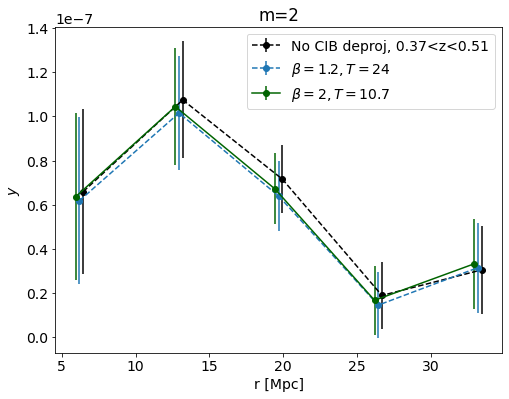

z=[0.37,0.51], m=3, chi_red= 0.023035509064937378
Systematic error: [-0.14863612  1.37846668 -3.55039311] percent


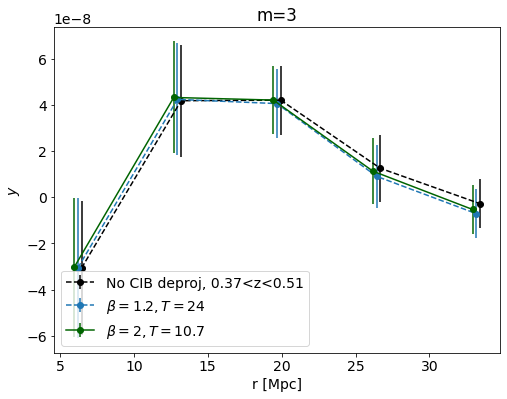

z=[0.37,0.51], m=4, chi_red= 0.011136718317395928
Systematic error: [-9.97545567 -5.16414853  6.62694582] percent


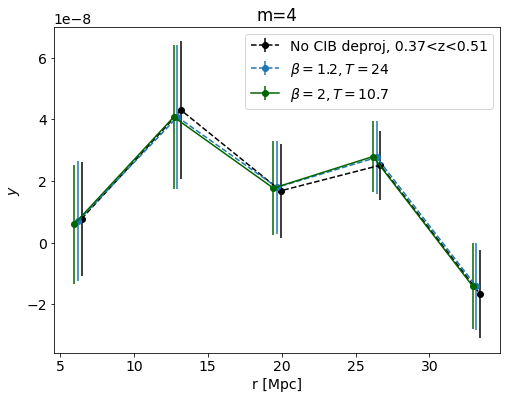

2.5 index 8
2.5 index 8
2.5 index 8
2.5 index 8
2.5 index 8
2.5 index 8
z=[0.54,0.70], m=0, chi_red= 1.332082836027938
Systematic error: [ -4.2440408  -23.94844337  15.52052463] percent


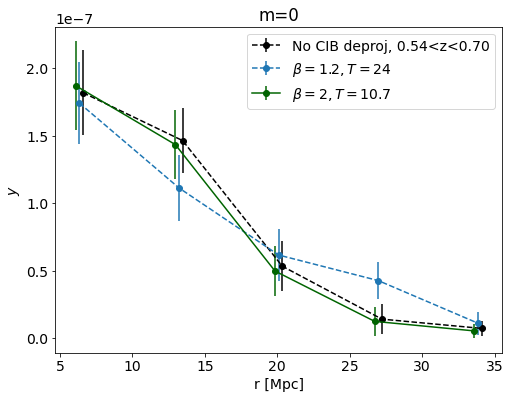

z=[0.54,0.70], m=1, chi_red= 0.20135645289266518
Systematic error: [-24.62714022  -9.95755191 -22.3096106 ] percent


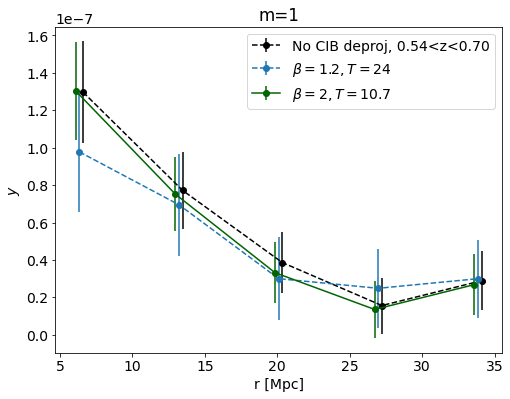

z=[0.54,0.70], m=2, chi_red= 0.02976738091785889
Systematic error: [-7.93018873  2.8345716  -3.39519485] percent


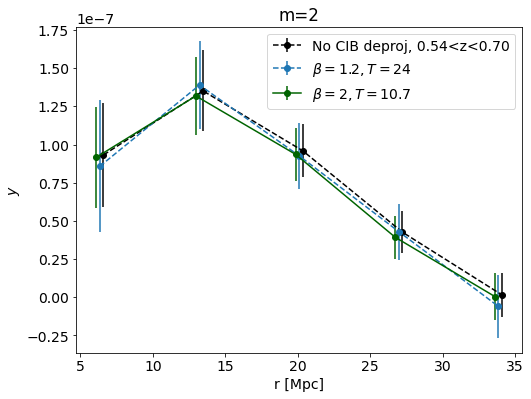

z=[0.54,0.70], m=3, chi_red= 0.05802994809962044
Systematic error: [-20.74429306   9.80599061 -21.67396231] percent


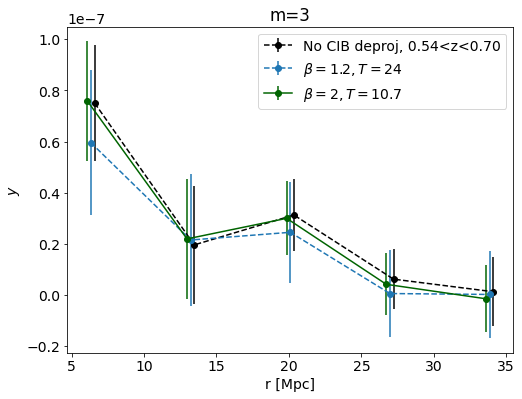

z=[0.54,0.70], m=4, chi_red= 0.06592578080181236
Systematic error: [ -224.26665994 -9213.52151982    49.04078401] percent


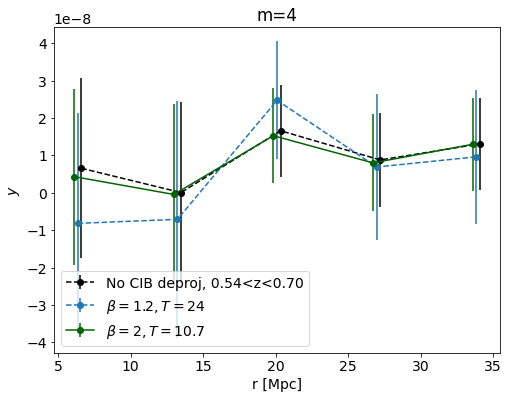

2.5 index 6
2.5 index 6
2.5 index 6
2.5 index 6
2.5 index 6
2.5 index 6
z=[0.74,0.92], m=0, chi_red= 0.6981109814456825
Systematic error: [ 56.89753687 -85.08712776 611.9851986 ] percent


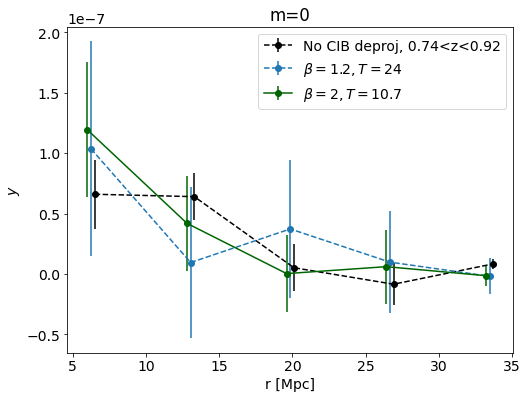

z=[0.74,0.92], m=1, chi_red= 0.5402656548539791
Systematic error: [ 231.16851379   21.20001215 -158.67669577] percent


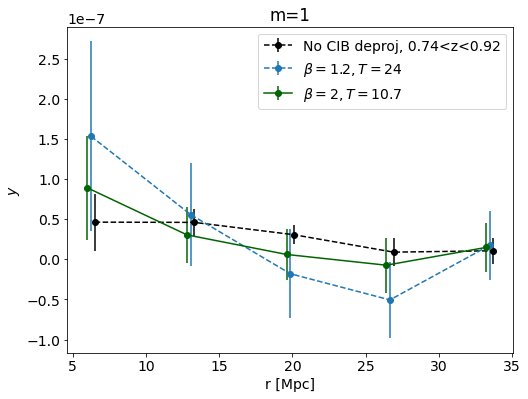

z=[0.74,0.92], m=2, chi_red= 2.1080206834437893
Systematic error: [700.54599671 289.89804651 -49.39543369] percent


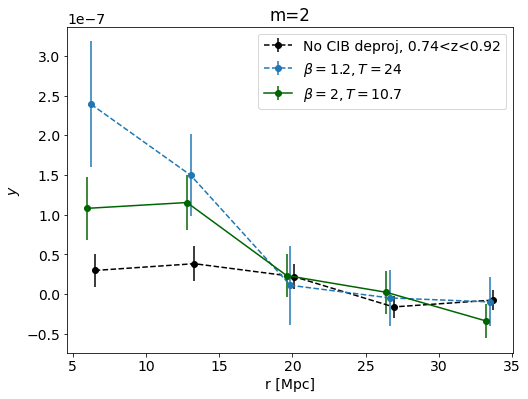

z=[0.74,0.92], m=3, chi_red= 2.406567496438978
Systematic error: [  -163.81281448   -184.00652128 -10912.09440248] percent


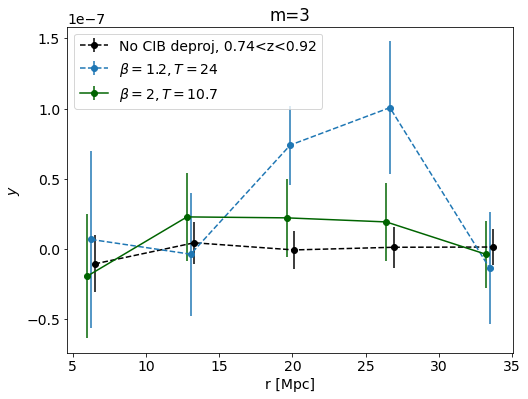

z=[0.74,0.92], m=4, chi_red= 1.152754032332586
Systematic error: [ 248.9414508  -280.92838792 6219.04229966] percent


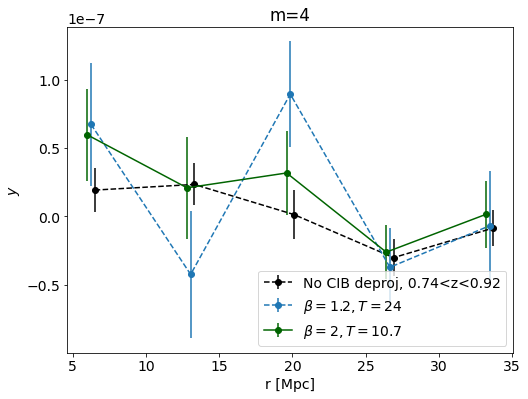

<Figure size 576x432 with 0 Axes>

In [11]:
# Comparing CIB-deprojected vs nothing-deprojected
nu_e_cuts = True
if nu_e_cuts:
    pt_selection_str = 'nugt2_egtpt3_'
else:
    pt_selection_str = ''
nreg = 24

b = 8
print("Red. chi-squared between fiducial CIB-deproj and no-deproj:")
chi_red_full = np.zeros([5, len(dbins)])
chisq_full = np.zeros([5, len(dbins)])
actpath = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
for c,dbin in enumerate(dbins):
    cl_dlow, cl_dhi = dbin[0], dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    
    mapstr = f'ilc_SZ_yy_4096_hpx'
    # ystr = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    act_nodeproj, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin)
    

    # acterrs   = np.load(actfile, allow_pickle=True)
    # profs = np.asarray(acterrs['prof'])
    # rmax = len(profs[0,:,0])
    # r_in_mpc = 40/rmax*np.arange(rmax)
    # idx_2p5 = np.where(np.abs(r_in_mpc-2.5) == np.min(np.abs(r_in_mpc-2.5)))[0][0]
    # # cut off profiles up to 2.5 Mpc
    # profs = profs[:,idx_2p5:,:]
    # act_nodeproj = cpp.Stack_object(img_splits=acterrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=np.asarray(acterrs['npks_list']).flatten(), rad_in_Mpc=40)
    # idx_r30 = np.where(np.abs(act_nodeproj.r-30) == np.min(np.abs(act_nodeproj.r-30)))[0][0]
    # for r in range(act_nodeproj.profile_splits.shape[1]):
    #     act_nodeproj.profile_splits[0,r,:] -= np.average(act_nodeproj.profile_splits[0,r,:][idx_r30:])
    #     act_nodeproj.profile_splits[0,r,:]
    # act_nodeproj.set_average_profiles()
    # act_nodeproj.bin_and_get_stats(b) #Mpc


    # mapstr = f'ilc_SZ_deproj_cib_yy_4096_hpx'
    # act_cibd_fid, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin)
    
    
    mapstr = f'ilc_SZ_deproj_cib_1.2_24.0_yy_4096_hpx'
    act_cibd_ul, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin)
    # actfile = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    # acterrs = np.load(actfile, allow_pickle=True)
    # profs = np.asarray(acterrs['prof'])
    # profs = profs[:,idx_2p5:,:]
    # act_cibd_ul = cpp.Stack_object(img_splits=acterrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=np.asarray(acterrs['npks_list']).flatten(), rad_in_Mpc=40)
    # idx_r30 = np.where(np.abs(act_cibd_ul.r-30) == np.min(np.abs(act_cibd_ul.r-30)))[0][0]
    # for r in range(act_cibd_ul.profile_splits.shape[1]):
    #     act_cibd_ul.profile_splits[0,r,:] -= np.average(act_cibd_ul.profile_splits[0,r,:][idx_r30:])
    # act_cibd_ul.set_average_profiles()
    # act_cibd_ul.bin_and_get_stats(b) #Mpc
    
    mapstr = f'ilc_SZ_deproj_cib_1.7_10.7_yy_4096_hpx'
    act_cibd_mid, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin)
    # actfile = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    # acterrs = np.load(actfile, allow_pickle=True)
    # profs = np.asarray(acterrs['prof'])
    # profs = profs[:,idx_2p5:,:]
    # act_cibd_mid = cpp.Stack_object(img_splits=acterrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=np.asarray(acterrs['npks_list']).flatten(), rad_in_Mpc=40)
    # idx_r30 = np.where(np.abs(act_cibd_mid.r-30) == np.min(np.abs(act_cibd_mid.r-30)))[0][0]
    # for r in range(act_cibd_mid.profile_splits.shape[1]):
    #     act_cibd_mid.profile_splits[0,r,:] -= np.average(act_cibd_mid.profile_splits[0,r,:][idx_r30:])
    # act_cibd_mid.set_average_profiles()
    # act_cibd_mid.bin_and_get_stats(b) #Mpc
    
    mapstr = f'ilc_SZ_deproj_cib_2.0_10.7_yy_4096_hpx'
    act_cibd_lr, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin)
    
    # actfile = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    # acterrs = np.load(actfile, allow_pickle=True)
    # profs = np.asarray(acterrs['prof'])
    # profs = profs[:,:,idx_2p5:]
    # act_cibd_ur = cpp.Stack_object(img_splits=acterrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=np.asarray(acterrs['npks_list']).flatten(), rad_in_Mpc=40)
    # idx_r30 = np.where(np.abs(act_cibd_ur.r-30) == np.min(np.abs(act_cibd_ur.r-30)))[0][0]
    # for r in range(act_cibd_ur.profile_splits.shape[1]):
    #     act_cibd_ur.profile_splits[0,r,:] -= np.average(act_cibd_ur.profile_splits[0,r,:][idx_r30:])
    # act_cibd_ur.set_average_profiles()
    # act_cibd_ur.bin_and_get_stats(b) #Mpc

    mapstr = f'ilc_SZ_deproj_cib_1.4_10.7_yy_4096_hpx'
    act_cibd_1p4, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin)
    # actfile = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    # acterrs = np.load(actfile, allow_pickle=True)
    # profs = np.asarray(acterrs['prof'])
    # profs = profs[:,:,idx_2p5:]
    # act_cibd_1p4 = cpp.Stack_object(img_splits=acterrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=np.asarray(acterrs['npks_list']).flatten(), rad_in_Mpc=40)
    # idx_r30 = np.where(np.abs(act_cibd_1p4.r-30) == np.min(np.abs(act_cibd_1p4.r-30)))[0][0]
    # for r in range(act_cibd_1p4.profile_splits.shape[1]):
    #     act_cibd_1p4.profile_splits[0,r,:] -= np.average(act_cibd_1p4.profile_splits[0,r,:][idx_r30:])
    # act_cibd_1p4.set_average_profiles()
    # act_cibd_1p4.bin_and_get_stats(b) #Mpc
    
    mapstr = f'ilc_SZ_deproj_cib_1.0_10.7_yy_4096_hpx'
    act_cibd_1p0, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin)
    # actfile = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    # acterrs = np.load(actfile, allow_pickle=True)
    # profs = np.asarray(acterrs['prof'])
    # profs = profs[:,:,idx_2p5:]
    # act_cibd_1p0 = cpp.Stack_object(img_splits=acterrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=np.asarray(acterrs['npks_list']).flatten(), rad_in_Mpc=40)
    # idx_r30 = np.where(np.abs(act_cibd_1p0.r-30) == np.min(np.abs(act_cibd_1p0.r-30)))[0][0]
    # for r in range(act_cibd_1p0.profile_splits.shape[1]):
    #     act_cibd_1p0.profile_splits[0,r,:] -= np.average(act_cibd_1p0.profile_splits[0,r,:][idx_r30:])
    # act_cibd_1p0.set_average_profiles()
    # act_cibd_1p0.bin_and_get_stats(b) #Mpc
    
    nbin = len(act_cibd_ul.r_binned)
    dof = nbin
    # get the chi squared between each of these
    for m in range(5):
        chisq_red = st.chisq(act_cibd_ul.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m], act_cibd_ul.covmat_binned[m], act_nodeproj.covmat_binned[m])/dof
        # a more basic chisquare test
        print("z=[{:.2f},{:.2f}], m={:d}, chi_red=".format(zlow.value, zhi.value, m), chisq_red)
        chi_red_full[m,c] = chisq_red
        chisq_full[m,c] = chisq_red*dof
        print("Systematic error:", (act_cibd_ul.avg_profiles_binned[m][0:3]-act_nodeproj.avg_profiles_binned[m][0:3])/act_nodeproj.avg_profiles_binned[m][0:3]*100, "percent")
        plt.errorbar(act_nodeproj.r_binned+.5, act_nodeproj.avg_profiles_binned[m], yerr=act_nodeproj.errors_binned[m], fmt='o', linestyle='--', label=r'No CIB deproj, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value), color='black') 
        # plt.errorbar(act_cibd_fid.r_binned-.5, act_cibd_fid.avg_profiles_binned[m], yerr=act_cibd_fid.errors_binned[m], fmt='o', linestyle='--', label=r'Standard CIB deproj')
        plt.errorbar(act_cibd_ul.r_binned+.25, act_cibd_ul.avg_profiles_binned[m], yerr=act_cibd_ul.errors_binned[m], fmt='o', linestyle='--', label=r'$\beta=1.2, T=24$') 
        plt.errorbar(act_cibd_lr.r_binned, act_cibd_lr.avg_profiles_binned[m], yerr=act_cibd_lr.errors_binned[m], fmt='o', linestyle='solid', label=r'$\beta=2, T=10.7$'.format(zlow.value, zhi.value), color='darkgreen') 
        # plt.errorbar(act_cibd_mid.r_binned-.5, act_cibd_mid.avg_profiles_binned[m], yerr=act_cibd_mid.errors_binned[m], fmt='^', linestyle='--', label=r'$\beta=1.7, T=10.7$', color='forestgreen')
        # plt.errorbar(act_cibd_1p4.r_binned-.25, act_cibd_1p4.avg_profiles_binned[m], yerr=act_cibd_1p4.errors_binned[m], fmt='*', linestyle='dotted', label=r'$\beta=1.4, T=10.7$', color='limegreen') 
        # plt.errorbar(act_cibd_1p0.r_binned+.25, act_cibd_1p0.avg_profiles_binned[m], yerr=act_cibd_1p0.errors_binned[m], fmt='*', linestyle='dashdot', label=r'$\beta=1.0, T=10.7$', color='lightgreen') 

        plt.legend()
        plt.ylabel("$y$")
        plt.title(f"m={m}")
        plt.xlabel("r [Mpc]")
        plt.show()
        plt.clf()
        
    # chi squared with respect to null
    # null_vector = np.zeros(len(act_cibd_fid.avg_profiles_binned[m]))
    # print(np.sqrt(st.chisq(act_cibd_fid.avg_profiles_binned[m], null_vector, act_cibd_fid.covmat_binned[m])/4.), np.sqrt(st.chisq(act_cibd_1p15.avg_profiles_binned[m], null_vector, act_cibd_1p15.covmat_binned[m])/4.), np.sqrt(st.chisq(act_nodeproj.avg_profiles_binned[m], null_vector, act_nodeproj.covmat_binned[m])/4.))

    # print("SNR from PTE", st.snr_from_pte(act_cibd_fid.avg_profiles_binned[m], np.zeros(len(act_cibd_fid.avg_profiles_binned[m])), act_cibd_fid.covmat_binned[m]))
    # plt.imshow(act_cibd_fid.covmat_binned[m])
    # plt.colorbar()
    # plt.show()
    # plt.clf()
    

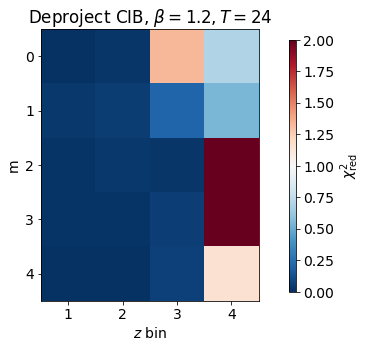

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# scmap = st.shiftedColorMap(plt.cm.RdBu_r, midpoint=2, name='shifted')
pval = 1 - sp.stats.chi2.cdf(chisq_full, dof)
scmap = st.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')

# snr_plot = ax.imshow(pval, cmap=scmap, vmin=0, vmax=1)
snr_plot = ax.imshow(chi_red_full, cmap='RdBu_r', vmin=0, vmax=2)
ax.set_ylabel("m")
# axs[c].set_title(f"z = {np.round(zlow.value,2)} - {np.round(zhi.value,2)}")
# replace x ticks with r values
ax.set_xticks(np.arange(len(dbins)))
ax.set_xticklabels(["1", "2", "3", "4"])
# ax.set_xticklabels([f"{np.round(z_at_value(cosmo.comoving_distance, (dbin[0])*u.Mpc).value,2)} - {np.round(z_at_value(cosmo.comoving_distance, (dbin[1])*u.Mpc).value,2)}" for dbin in dbins], rotation=45)
ax.set_xlabel(r"$z$ bin")
plt.title(r"Deproject CIB, $\beta=1.2, T=24$")
# add an axis for a colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(snr_plot, cax=cbar_ax, label=r"$\chi^2_{\rm{red}}$")
# centered title
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/cib_deproj_nulltests_ul.pdf", bbox_inches="tight")
plt.show()